In [53]:
from joblib import Parallel, delayed
import os

# Définir le nombre de cœurs disponibles
n_jobs = os.cpu_count()  # ou directement spécifier 20

print(f"Utilisation de {n_jobs} cœurs pour la parallélisation des tâches.")


Utilisation de 20 cœurs pour la parallélisation des tâches.


In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Définir le chemin vers les labels et les images
label_file = '/mnt/c/Users/Ory-K/Documents/MLE DataScientest/Jul24_bds_extraction/RVL-CDIP Dataset_200824/labels/train.txt'
image_base_path = '/mnt/c/Users/Ory-K/Documents/MLE DataScientest/Jul24_bds_extraction/RVL-CDIP Dataset_200824/images'

# Dictionnaire des catégories
categories_dict = {
    "0": "letter",
    "1": "form",
    "2": "email",
    "3": "handwritten",
    "4": "advertisement",
    "5": "scientific report",
    "6": "scientific publication",
    "7": "specification",
    "8": "file folder",
    "9": "news article",
    "10": "budget",
    "11": "invoice",
    "12": "presentation",
    "13": "questionnaire",
    "14": "resume",
    "15": "memo"
}

# Lire les chemins d'images et les catégories
with open(label_file, 'r') as f:
    lines = f.readlines()

# Sélectionner un échantillon de données
sample_size = 16  # Nombre d'images à visualiser
samples = [line.strip().split() for line in lines[:sample_size]]

# Charger et afficher les images avec leurs étiquettes
plt.figure(figsize=(15, 10))
for i, (relative_image_path, category) in enumerate(samples):
    image_path = os.path.join(image_base_path, relative_image_path)
    image = mpimg.imread(image_path)
    
    # Récupérer le nom de la catégorie
    category_name = categories_dict.get(category, "Unknown")
    
    plt.subplot(4, 4, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Catégorie: {category_name} ({category})")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from collections import Counter

# Extraire les catégories
categories = [line.strip().split()[1] for line in lines]

# Compter le nombre de documents par catégorie
category_counts = Counter(categories)

# Remplacer les clés (numéros de catégories) par leurs noms correspondants
category_counts_named = {categories_dict[key]: value for key, value in category_counts.items()}

# Créer un graphique en barres
plt.figure(figsize=(12, 8))
plt.bar(category_counts_named.keys(), category_counts_named.values(), color='skyblue')
plt.xlabel('Catégorie')
plt.ylabel('Nombre de documents')
plt.title('Nombre de documents par catégorie (train.txt)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
import concurrent.futures
from PIL import Image
import os

widths = []
heights = []

# Sélectionner un échantillon de données
sample_size = 2000  # Nombre d'images à visualiser
samples = [line.strip().split() for line in lines[:sample_size]]


def process_image(image_path):
    with Image.open(image_path) as img:
        return img.width, img.height


image_paths = [os.path.join(image_base_path, relative_image_path) for relative_image_path, _ in samples]

# Utiliser un pool de processus pour paralléliser la lecture des images
with concurrent.futures.ProcessPoolExecutor() as executor:
    results = executor.map(process_image, image_paths)

# Récupérer les résultats
for width, height in results:
    widths.append(width)
    heights.append(height)

# Visualisation comme avant
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(widths, bins=30, color='blue', alpha=0.7)
plt.title('Distribution des Largeurs des Images')
plt.xlabel('Largeur (pixels)')
plt.ylabel('Nombre')

plt.subplot(1, 2, 2)
plt.hist(heights, bins=10, color='green', alpha=0.7)
plt.title('Distribution des Hauteurs des Images')
plt.xlim(980, 1020)
plt.xticks(range(980, 1021, 10))
plt.xlabel('Hauteur (pixels)')
plt.ylabel('Nombre')

plt.tight_layout()
plt.show()



for relative_image_path, _ in samples:  # samples contient les chemins vers les images
    image_path = os.path.join(image_base_path, relative_image_path)
    with Image.open(image_path) as img:
        widths.append(img.width)
        heights.append(img.height)
        # Afficher les dimensions pour vérifier s'il y a des anomalies
        # print(f"Image: {relative_image_path} - Width: {img.width}, Height: {img.height}")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(widths, bins=30, color='blue', alpha=0.7)
plt.title('Distribution des Largeurs des Images')
plt.xlabel('Largeur (pixels)')
plt.ylabel('Nombre')

plt.subplot(1, 2, 2)
plt.hist(heights, bins=10, color='green', alpha=0.7)
plt.title('Distribution des Hauteurs des Images')
plt.xlim(980, 1020)
plt.xticks(range(980, 1021, 10))
plt.xlabel('Hauteur (pixels)')
plt.ylabel('Nombre')

plt.tight_layout()
plt.show()


In [ ]:
# Initialiser les listes pour les largeurs, hauteurs et ratios
widths = []
heights = []
ratios = []

# Parcourir les images et calculer les ratios largeur/hauteur
for relative_image_path, _ in samples:  # samples contient les chemins vers les images
    image_path = os.path.join(image_base_path, relative_image_path)
    with Image.open(image_path) as img:
        width = img.width
        height = img.height
        ratio = width / height

        widths.append(width)
        heights.append(height)
        ratios.append(ratio)

# Visualiser la distribution des ratios largeur/hauteur
plt.figure(figsize=(10, 6))
plt.hist(ratios, bins=20, color='purple', alpha=0.7)
plt.title('Distribution des Ratios Largeur/Hauteur des Images')
plt.xlabel('Ratio Largeur/Hauteur')
plt.ylabel('Nombre d\'images')
plt.grid(True)
plt.show()

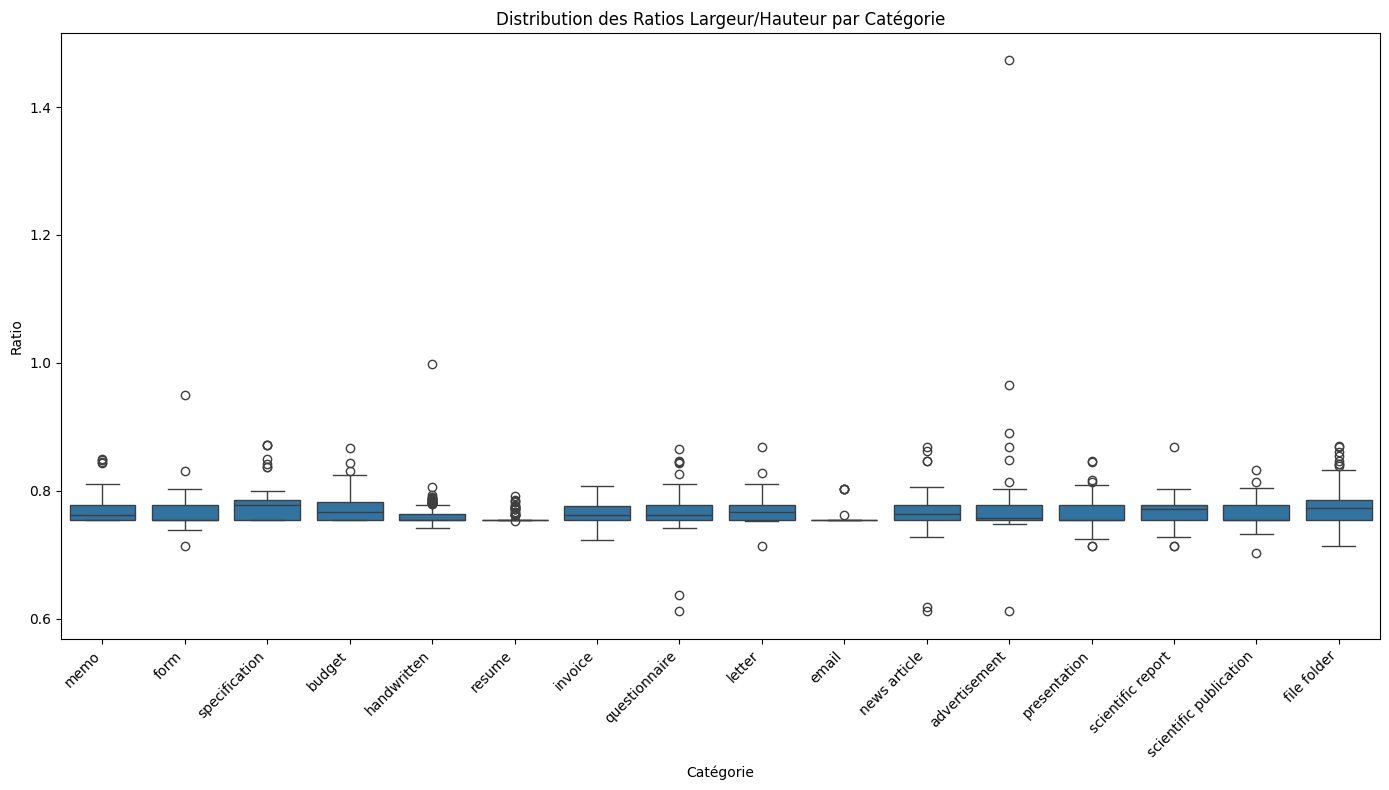

In [35]:
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Initialiser les listes pour les données
ratios = []
categories_list = []

# Dictionnaire des catégories
categories_dict = {
    "0": "letter",
    "1": "form",
    "2": "email",
    "3": "handwritten",
    "4": "advertisement",
    "5": "scientific report",
    "6": "scientific publication",
    "7": "specification",
    "8": "file folder",
    "9": "news article",
    "10": "budget",
    "11": "invoice",
    "12": "presentation",
    "13": "questionnaire",
    "14": "resume",
    "15": "memo"
}

# Parcourir les images et calculer les ratios largeur/hauteur pour chaque catégorie
for relative_image_path, category in samples:  # samples contient les chemins vers les images et leurs catégories
    image_path = os.path.join(image_base_path, relative_image_path)
    with Image.open(image_path) as img:
        width = img.width
        height = img.height
        ratio = width / height

        ratios.append(ratio)
        categories_list.append(categories_dict[category])

# Créer un DataFrame pour la visualisation
df = pd.DataFrame({
    'Ratio': ratios,
    'Catégorie': categories_list
})

# Visualiser avec des box plots
plt.figure(figsize=(14, 8))
sns.boxplot(x='Catégorie', y='Ratio', data=df)
plt.title('Distribution des Ratios Largeur/Hauteur par Catégorie')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


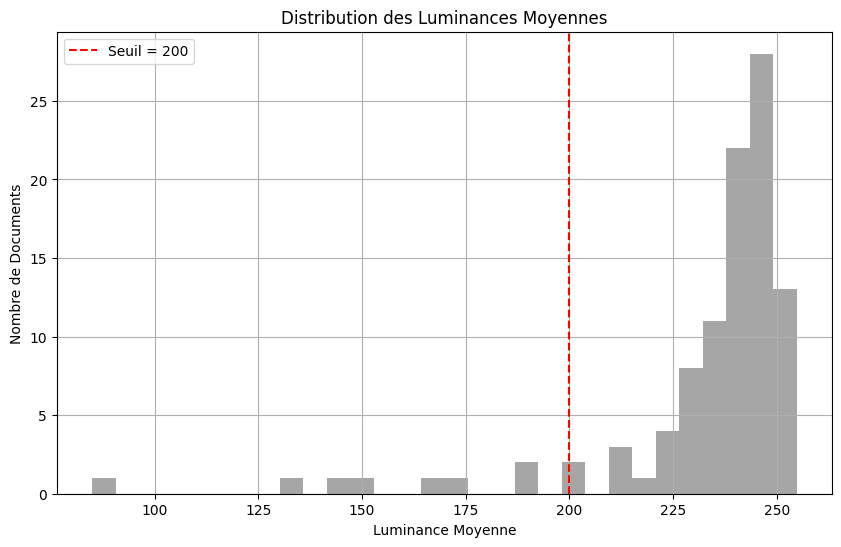

Documents avec une luminance moyenne inférieure à : 200
Image: imagesm/m/r/d/mrd16e00/2044400348.tif, Luminance Moyenne: 131.43, Catégorie: advertisement
Image: imagesp/p/i/u/piu62d00/80303362_3392.tif, Luminance Moyenne: 84.94, Catégorie: presentation
Image: imagesn/n/t/y/nty14d00/507705676.tif, Luminance Moyenne: 188.38, Catégorie: handwritten
Image: imagesg/g/p/u/gpu54c00/01792718.tif, Luminance Moyenne: 199.53, Catégorie: advertisement
Image: imagesw/w/k/q/wkq35f00/0060031148.tif, Luminance Moyenne: 170.94, Catégorie: presentation
Image: imagesj/j/t/c/jtc33e00/2021548774_2021548781.tif, Luminance Moyenne: 152.25, Catégorie: scientific publication
Image: imagesz/z/x/n/zxn82f00/tob07323.07_tob07323.08.tif, Luminance Moyenne: 165.75, Catégorie: news article
Image: imagesi/i/y/y/iyy74c00/91654603_4604.tif, Luminance Moyenne: 187.95, Catégorie: advertisement
Image: imagesf/f/y/p/fyp36c00/2072280165.tif, Luminance Moyenne: 147.10, Catégorie: advertisement


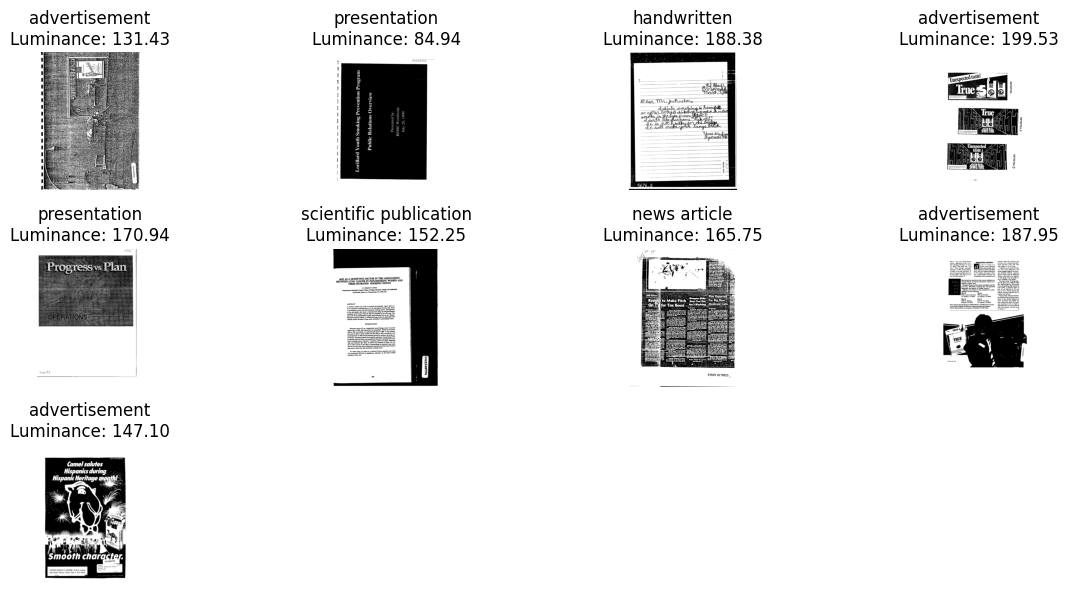

In [49]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Base path pour les images
image_base_path = '/mnt/c/Users/Ory-K/Documents/MLE DataScientest/Jul24_bds_extraction/RVL-CDIP Dataset_200824/images'

# Lire les chemins d'images et les catégories
label_file = '/mnt/c/Users/Ory-K/Documents/MLE DataScientest/Jul24_bds_extraction/RVL-CDIP Dataset_200824/labels/train.txt'
with open(label_file, 'r') as f:
    lines = f.readlines()

# Sélectionner un échantillon de données
sample_size = 100  # Augmenter la taille de l'échantillon pour mieux visualiser la distribution
samples = [line.strip().split() for line in lines[:sample_size]]

# Dictionnaire des catégories
categories_dict = {
    "0": "letter",
    "1": "form",
    "2": "email",
    "3": "handwritten",
    "4": "advertisement",
    "5": "scientific report",
    "6": "scientific publication",
    "7": "specification",
    "8": "file folder",
    "9": "news article",
    "10": "budget",
    "11": "invoice",
    "12": "presentation",
    "13": "questionnaire",
    "14": "resume",
    "15": "memo"
}

# Calculer la luminance moyenne pour chaque image
luminance_means = []

for relative_image_path, category in samples:
    image_path = os.path.join(image_base_path, relative_image_path)
    image = Image.open(image_path)
    gray_array = np.array(image)
    
    # Calculer la luminance moyenne
    mean_luminance = np.mean(gray_array)
    luminance_means.append((relative_image_path, mean_luminance, categories_dict[category]))

# Extraire les luminances moyennes pour le plot
luminance_values = [mean for _, mean, _ in luminance_means]


# Définir un seuil pour identifier les documents à fond foncé
seuil = 200  # Ce seuil peut être ajusté en fonction du plot

# Plot de la distribution des luminances moyennes
plt.figure(figsize=(10, 6))
plt.hist(luminance_values, bins=30, color='gray', alpha=0.7)
plt.axvline(x=seuil, color='red', linestyle='--', label=f"Seuil = {seuil}")
plt.title('Distribution des Luminances Moyennes')
plt.xlabel('Luminance Moyenne')
plt.ylabel('Nombre de Documents')
plt.grid(True)
plt.legend()
plt.show()


# Identifier et afficher les documents avec une luminance moyenne inférieure au seuil
dark_documents = [doc for doc in luminance_means if doc[1] < seuil]

print(f"Documents avec une luminance moyenne inférieure à : {seuil}")
for doc in dark_documents:
    print(f"Image: {doc[0]}, Luminance Moyenne: {doc[1]:.2f}, Catégorie: {doc[2]}")

# Visualiser les documents à fond foncé
plt.figure(figsize=(12, 8))
for i, (image_path, mean_luminance, category) in enumerate(dark_documents):
    image_full_path = os.path.join(image_base_path, image_path)
    image = Image.open(image_full_path)
    
    plt.subplot(4, 4, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'{category}\nLuminance: {mean_luminance:.2f}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [54]:
from joblib import Parallel, delayed
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.ndimage import generic_filter

def local_variance(arr):
    return arr.var()

def process_image(image_path, category, categories_dict):
    with Image.open(image_path) as img:
        gray_array = np.array(img)
        
        # Calculer la luminance moyenne
        mean_luminance = np.mean(gray_array)
        
        # Calculer la variance locale
        local_var = generic_filter(gray_array, local_variance, size=3)
        mean_local_var = np.mean(local_var)
        
        return (image_path, mean_luminance, mean_local_var, categories_dict[category])

# Base path pour les images
image_base_path = '/mnt/c/Users/Ory-K/Documents/MLE DataScientest/Jul24_bds_extraction/RVL-CDIP Dataset_200824/images'

# Lire les chemins d'images et les catégories
label_file = '/mnt/c/Users/Ory-K/Documents/MLE DataScientest/Jul24_bds_extraction/RVL-CDIP Dataset_200824/labels/train.txt'
with open(label_file, 'r') as f:
    lines = f.readlines()

# Sélectionner un échantillon de données
sample_size = 16
samples = [line.strip().split() for line in lines[:sample_size]]

# Dictionnaire des catégories
categories_dict = {
    "0": "letter",
    "1": "form",
    "2": "email",
    "3": "handwritten",
    "4": "advertisement",
    "5": "scientific report",
    "6": "scientific publication",
    "7": "specification",
    "8": "file folder",
    "9": "news article",
    "10": "budget",
    "11": "invoice",
    "12": "presentation",
    "13": "questionnaire",
    "14": "resume",
    "15": "memo"
}

image_paths = [os.path.join(image_base_path, relative_image_path) for relative_image_path, category in samples]

# Appliquer la parallélisation avec Joblib
results = Parallel(n_jobs=n_jobs)(delayed(process_image)(image_path, category, categories_dict) for (image_path, category) in samples)

# Définir un seuil pour la variance locale pour identifier les images granuleuses
variance_threshold = 50

# Filtrer les images granuleuses
granular_documents = [doc for doc in results if doc[2] > variance_threshold]

# Afficher les résultats
for doc in granular_documents:
    print(f"Image: {doc[0]}, Luminance Moyenne: {doc[1]:.2f}, Variance Locale Moyenne: {doc[2]:.2f}, Catégorie: {doc[3]}")

# Visualiser les documents granuleux
plt.figure(figsize=(12, 8))
for i, (image_path, mean_luminance, mean_local_var, category) in enumerate(granular_documents):
    image_full_path = os.path.join(image_base_path, image_path)
    image = Image.open(image_full_path)
    
    plt.subplot(4, 4, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'{category}\nLuminance: {mean_luminance:.2f}\nVar: {mean_local_var:.2f}')
    plt.axis('off')

plt.tight_layout()
plt.show()


30792.56s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
30792.77s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
30792.98s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
30793.18s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
30793.38s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
30793.62s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


FileNotFoundError: [Errno 2] No such file or directory: '/home/kory/DST_RVL-CDIP/notebooks/imagesq/q/o/c/qoc54c00/80035521.tif'